# ECE 143 Individual Project: Ad-Hoc Communications Network
This is my solution to problem of the Ad-Hoc Communications Network. 

### Imports

In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import time
from NB_Modules import *
from Modules import create_rand_tower, create_max
from TowerClass import Tower

### Variables
Please enter the width and height (as integers) of the desired coverage footprint below:

In [15]:
desired_width = 10
desired_height = 10

### Design of Communication Towers
The problem required that each communication tower have a height, width, and position sampled from a uniform distribution.
<br>
<br>
My tower objects each have a coordinate, height, and width variable. The coordinate is the position of the bottom left-hand corner, so that the width and height extend towards the positive x-y direction on the 2D Cartesian coordinate system.
<br>
<br>
Since each tower's coverage must stay within the region of interest (ROI), the tower's coverage and the tower's position can not be randomly chosen at the same time, because the coverage area limits where a tower can be placed and the tower's starting position limits the total possible coverage area. One must be determined before the other, so I decided to first uniformly sample the height and width. On average, this should allow for towers with larger areas because the only constraint is the ROI, rather than both the starting coordinate and the ROI.
<br>
<br>
Running the code below will produce a random tower within the desired coverage footprint and a visualization of the tower.
<br>
If you want to create a non-random tower, uncomment the fourth line. The tower is initialized as Tower((x,y),width,height). (x,y) is a tuple and height and width are both integers. (Warning! Towers outside of the ROI can be created without error, only create_rand_tower() can ensure the creation of towers within the footprint)

Starting Coord:(1, 0), Width :7, Height:3


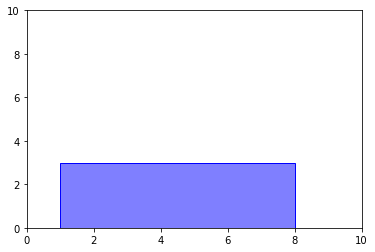

In [3]:
%matplotlib inline
fig,ax = plt.subplots(1)
plt.axis([0,desired_width,0,desired_height])
tow = create_rand_tower(desired_width, desired_height)
# tow = Tower((0,0),5,5)
rect = get_rects([tow])
ax.add_patch(rect[0])
fig.canvas.draw()
print tow

## Q1: Resulting Coverage from Given Number of Communication Towers
Please enter the desired number of communication towers (as integer greater than zero) below:

In [4]:
num_towers = 10

The following function will randomly create the number of towers specified above and return lists of both the random towers and the resulting trimmed towers. I assume that if a randomly placed new tower does not contribute any unique coverage, it will not be counted towards the total number of towers. Instead, it will be replaced until a random tower can contribute unique coverage or the region of interest has been completely filled.

In [5]:
[trimmed, original] = coverage(desired_width, desired_height, num_towers)
print original
print trimmed

[Starting Coord:(1, 0), Width :4, Height:10, Starting Coord:(2, 8), Width :8, Height:1, Starting Coord:(1, 0), Width :7, Height:4, Starting Coord:(1, 0), Width :9, Height:8, Starting Coord:(0, 0), Width :2, Height:4, Starting Coord:(7, 1), Width :2, Height:8, Starting Coord:(9, 0), Width :1, Height:7, Starting Coord:(0, 0), Width :8, Height:8, Starting Coord:(7, 3), Width :1, Height:7, Starting Coord:(1, 0), Width :8, Height:7]
[Starting Coord:(1, 0), Width :4, Height:10, Starting Coord:(5, 8), Width :5, Height:1, Starting Coord:(5, 0), Width :3, Height:4, Starting Coord:(5, 4), Width :5, Height:4, Starting Coord:(0, 0), Width :1, Height:4, Starting Coord:(8, 1), Width :1, Height:3, Starting Coord:(9, 0), Width :1, Height:4, Starting Coord:(0, 4), Width :1, Height:4, Starting Coord:(7, 9), Width :1, Height:1, Starting Coord:(8, 0), Width :1, Height:1]


Below is code for a dynamic plot showing the algorithm in action. **Must be run in a Jupyter Notebook. Github will only show the static final result.**

<IPython.core.display.Javascript object>


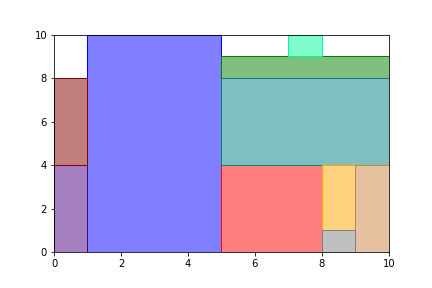

In [6]:
# This is required to display the dynamic graphs
%matplotlib notebook

trimmed_rects = get_rects(trimmed)
original_rects = get_rects(original)
fig,ax = plt.subplots(1)
plt.axis([0,desired_width,0,desired_height])
time.sleep(1)
ax.add_patch(trimmed_rects[0])
fig.canvas.draw()
for i in range(1,len(trimmed_rects)):
    time.sleep(0.5)
    ax.add_patch(original_rects[i])
    fig.canvas.draw()
    if not trimmed[i] == original[i]:
        time.sleep(0.5)
        original_rects[i].remove()
        fig.canvas.draw()
        ax.add_patch(trimmed_rects[i])
        fig.canvas.draw()

# Random space was added after visualization completed. This fixed it for some reason.
%matplotlib notebook

The graph below shows two static subplots side-by-side, one with all the random towers and one with all the trimmed towers, which should mirror the result from above.

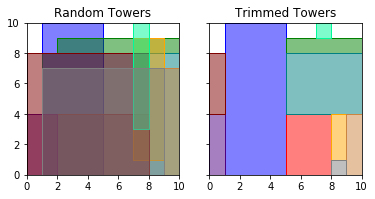

In [7]:
# Back to "normal" inline graphs
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1,2, sharex = True, sharey = True)
trimmed_rects = get_rects(trimmed)
original_rects = get_rects(original)
ax1.set_xlim(0, desired_width)
ax1.set_ylim(0, desired_height)
ax1.set_title('Random Towers')
ax1.set(adjustable='box-forced', aspect='equal')
for i in original_rects:
    ax1.add_patch(i)

ax2.set(adjustable='box-forced', aspect='equal')
ax2.set_title('Trimmed Towers')
for i in trimmed_rects:
    ax2.add_patch(i)
plt.show()

### Design of the Algorithm
The algorithm works by taking in the a random tower and a list of all the towers already locked into the region of interest. One-by-one the existing towers will trim the new random tower, with each existing tower trimming the results of the previous. This continues until there is either no unique coverage, where then the random tower is discarded, or until there are no more exisitng towers, which results in a list of all possible subtowers that each provide non-overlapping and unique coverage. The algorithm then finds the subtower with largest area and locks that into the region of interest. The algorithm then restarts with a new random tower until the ROI has been completely filled or the correct number of towers has been placed.

## Q2: Total Area of Coverage
The following output is the total coverage area over the desired coverage footprint:

In [8]:
print "Area Covered Over Total Area: %s/%s " % (coverage_area(trimmed),desired_width*desired_height)
print string_gaps(desired_width,desired_height, trimmed)

Area Covered Over Total Area: 94/100 
There are gaps in the coverage


## Q3: Average Number of Towers for Full Coverage
Please enter the number of simulations desired (as a positive integer) to compute the average number towers needed for full coverage:

In [9]:
num_runs = 100

Running the code below will compute the average number of towers needed to completely cover the region of interest over the given number of simulations. 

In [16]:
assert isinstance(num_runs,int) and num_runs > 0, "Number of simulations is not correct input"
sum = 0
for _ in range(0,num_runs):
    [_,_,num_towers] = full_coverage(desired_height,desired_width)
    sum = sum + num_towers
print "Average Number of Towers: %s" % (float(sum)/num_runs)

Average Number of Towers: 13.3


## Limitations of the Problem
The main limitation of the problem is that we cannot selectively determine and chose how and in which order to place our towers. If we were given more control over restraints such as retaining only the maximum remaining coverage area or the order of when the towers come online, we would likely be able to increase the total area of coverage. In addition, we have practically no control over the coverage area and position of towers created through random uniform distributions.